In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/FDM Data Set - Telecommunication/Hotel Reservations.csv')

In [4]:
# Show data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Descriptive statistic on dataset on numerical columns
data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'required_car_parking_space', 'lead_time',
    'arrival_year', 'arrival_month', 'arrival_date',
    'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


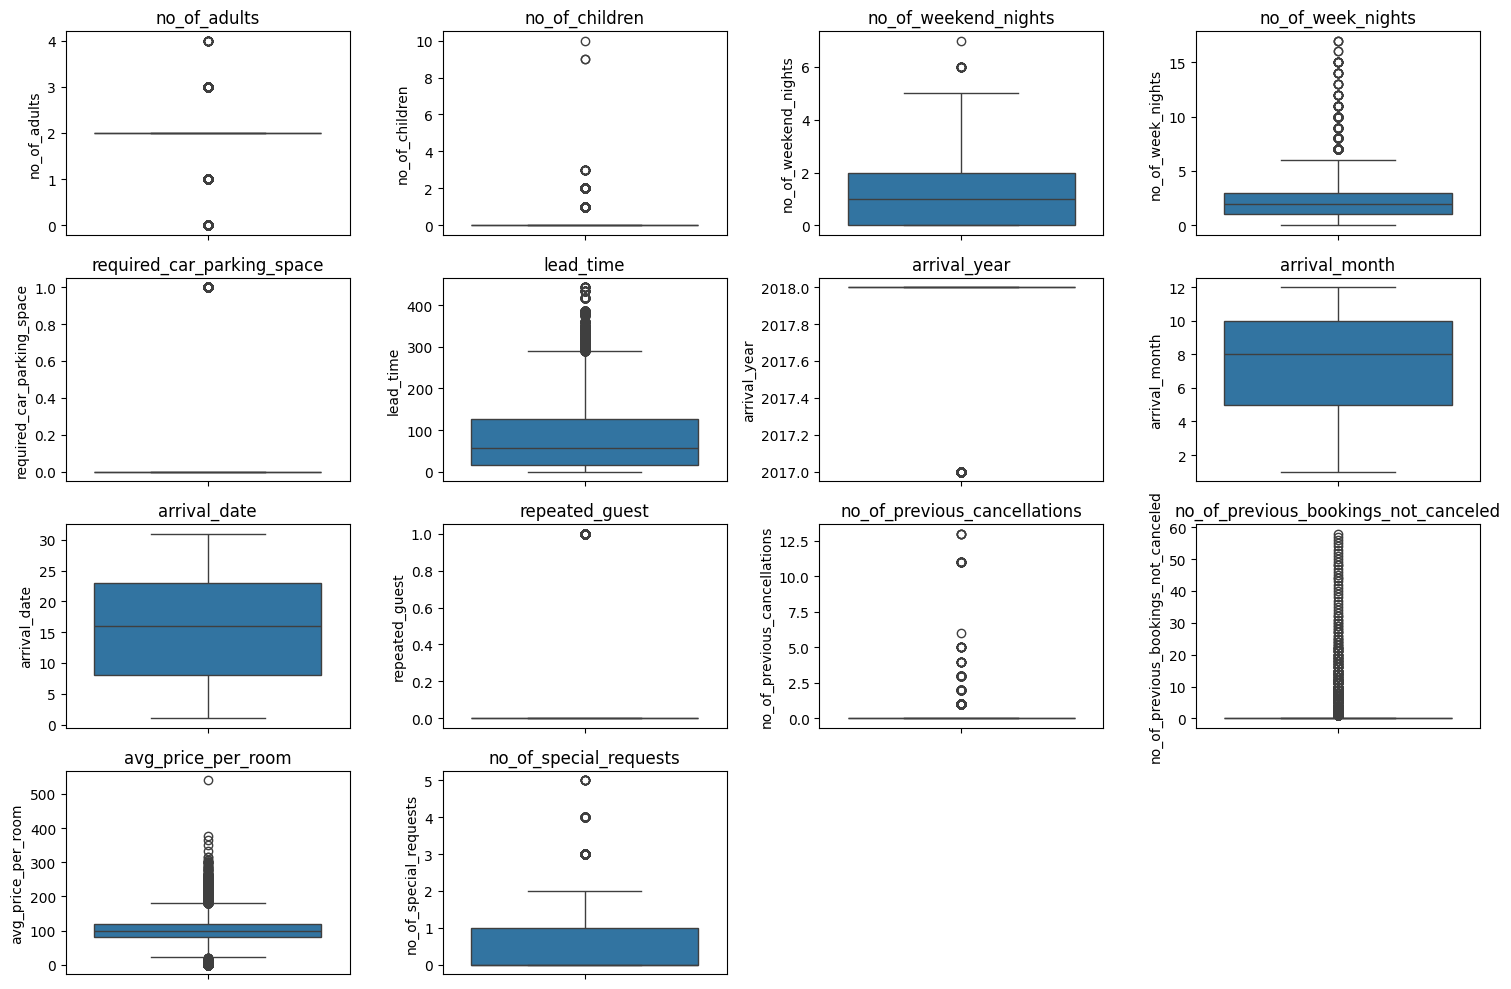

In [6]:
# prompt: check for the out liers in this data set

# Box plot for numerical features to visualize outliers
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                      'no_of_week_nights', 'required_car_parking_space', 'lead_time',
                      'arrival_year', 'arrival_month', 'arrival_date',
                      'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [7]:
# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

In [8]:
# Encode categorical variables
label_encoders = {}
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [9]:
# Print the encoding and decoding maps
print("Encoding Maps:")
encoding_maps
print("\nDecoding Maps:")
decoding_maps

Encoding Maps:

Decoding Maps:


{'type_of_meal_plan': {0: 'Meal Plan 1',
  1: 'Meal Plan 2',
  2: 'Meal Plan 3',
  3: 'Not Selected'},
 'room_type_reserved': {0: 'Room_Type 1',
  1: 'Room_Type 2',
  2: 'Room_Type 3',
  3: 'Room_Type 4',
  4: 'Room_Type 5',
  5: 'Room_Type 6',
  6: 'Room_Type 7'},
 'market_segment_type': {0: 'Aviation',
  1: 'Complementary',
  2: 'Corporate',
  3: 'Offline',
  4: 'Online'},
 'booking_status': {0: 'Canceled', 1: 'Not_Canceled'}}

In [10]:
print(data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


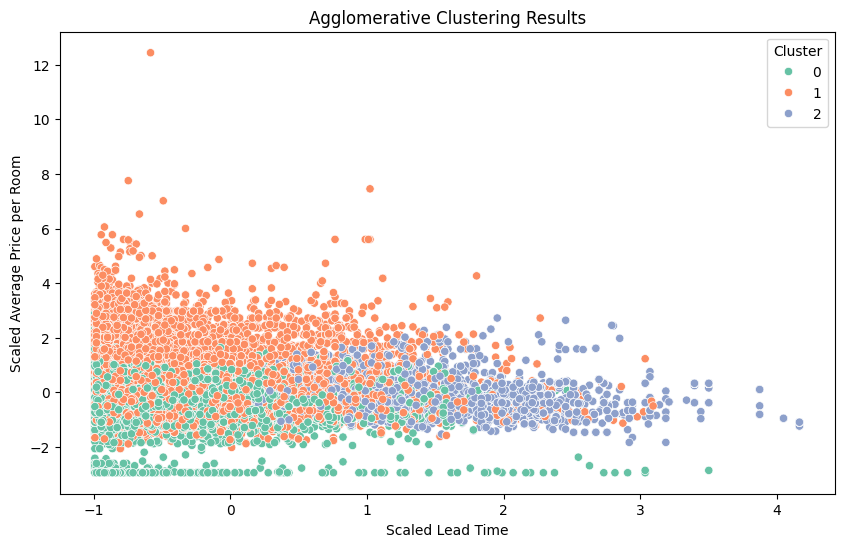

Agglomerative_Cluster
1    16013
0    15031
2     5231
Name: count, dtype: int64


In [16]:
# Select features for clustering
clustering_data = data[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'market_segment_type']]

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply Agglomerative Clustering
agglo_cluster = AgglomerativeClustering(n_clusters=3)  # Setting the number of clusters to 3
data['Agglomerative_Cluster'] = agglo_cluster.fit_predict(clustering_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_data_scaled[:, 0], y=clustering_data_scaled[:, 1], hue=data['Agglomerative_Cluster'], palette="Set2")
plt.title("Agglomerative Clustering Results")
plt.xlabel('Scaled Lead Time')
plt.ylabel('Scaled Average Price per Room')
plt.legend(title='Cluster')
plt.show()

# Check the distribution of clusters
print(data['Agglomerative_Cluster'].value_counts())

In [17]:
import pandas as pd

# Step 1: Count the number of samples in each cluster
cluster_counts = data['Agglomerative_Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Step 2: Calculate mean values for features within each cluster
cluster_summary = data.groupby('Agglomerative_Cluster')[['avg_price_per_room', 'lead_time',
                                                           'no_of_special_requests', 'market_segment_type']].mean()

# Reset the index to make it easier to work with
cluster_summary = cluster_summary.reset_index()

# Step 3: Assign labels based on the average values
def assign_label(row):
    if row['avg_price_per_room'] > 100:  # Define thresholds for Luxury
        return 'Luxury'
    elif row['avg_price_per_room'] < 70:  # Define thresholds for Budget
        return 'Budget'
    else:
        return 'Frequent'

cluster_summary['Cluster_Label'] = cluster_summary.apply(assign_label, axis=1)

# Display the cluster summary with labels
print("\nCluster Summary with Labels:")
print(cluster_summary)

Cluster Counts:
Agglomerative_Cluster
1    16013
0    15031
2     5231
Name: count, dtype: int64

Cluster Summary with Labels:
   Agglomerative_Cluster  avg_price_per_room   lead_time  \
0                      0           89.012670   57.606480   
1                      1          118.376821   61.710360   
2                      2           99.057811  236.620149   

   no_of_special_requests  market_segment_type Cluster_Label  
0                0.064666             3.147894      Frequent  
1                1.268157             3.908324        Luxury  
2                0.229210             3.625502      Frequent  


In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate the silhouette score for Agglomerative Clustering
silhouette_avg_agglo = silhouette_score(clustering_data_scaled, data['Agglomerative_Cluster'])
print(f'Silhouette Score (Agglomerative): {silhouette_avg_agglo:.4f}')

# Calculate the Davies-Bouldin Index for Agglomerative Clustering
davies_bouldin_agglo = davies_bouldin_score(clustering_data_scaled, data['Agglomerative_Cluster'])
print(f'Davies-Bouldin Index (Agglomerative): {davies_bouldin_agglo:.4f}')

# Calculate the Calinski-Harabasz Index for Agglomerative Clustering
calinski_harabasz_agglo = calinski_harabasz_score(clustering_data_scaled, data['Agglomerative_Cluster'])
print(f'Calinski-Harabasz Index (Agglomerative): {calinski_harabasz_agglo:.4f}')


Silhouette Score (Agglomerative): 0.2542
Davies-Bouldin Index (Agglomerative): 1.3288
Calinski-Harabasz Index (Agglomerative): 10721.8806
